**Task - 
Disease Prediction from Medical Data**

In [186]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
train_data=pd.read_csv("training.csv")
test_data=pd.read_csv("testing.csv")

In [188]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [189]:
train_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [190]:
train_data.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [191]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [192]:
train_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1- Pre processing

In [193]:
train_data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

Find Outliers

In [194]:
Q1=train_data.quantile(0.25)
Q3=train_data.quantile(0.75)

IQR= Q3-Q1

#Get the whiskers
min= Q1 -(1.5*IQR)
max= Q3 +(1.5*IQR)

outliers=train_data[(train_data < min) | (train_data> max)]

print(outliers)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0         1.0        1.0                   1.0                  NaN   
1         NaN        1.0                   1.0                  NaN   
2         1.0        NaN                   1.0                  NaN   
3         1.0        1.0                   NaN                  NaN   
4         1.0        1.0                   1.0                  NaN   
...       ...        ...                   ...                  ...   
4915      NaN        NaN                   NaN                  NaN   
4916      NaN        1.0                   NaN                  NaN   
4917      NaN        NaN                   NaN                  NaN   
4918      NaN        1.0                   NaN                  NaN   
4919      NaN        1.0                   NaN                  NaN   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0           NaN     NaN         NaN           NaN      NaN         

C:\Users\AYA\AppData\Local\Temp\ipykernel_2688\4239695130.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=train_data[(train_data < min) | (train_data> max)]


In [195]:
x_train=train_data.iloc[:,:-1]

y_train=train_data['prognosis']

x_test=test_data.drop(columns=['prognosis'])

y_test=test_data['prognosis']

Visualization

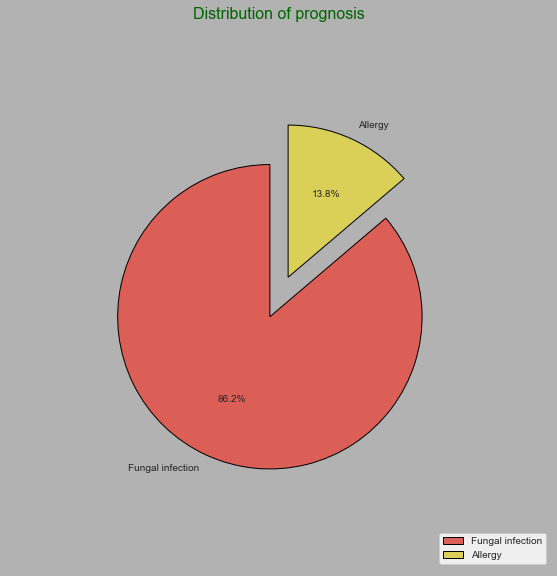

In [196]:
fig, ax = plt.subplots(figsize=(20,10))
fig.set_facecolor('#b2b2b2')

unique_values = train_data['itching'].unique()
prognosis = ['Fungal infection', 'Allergy']
explode = [0.1] * len(unique_values)  # Example: explode each slice by 0.1

ax.pie(
    train_data['itching'].value_counts(),
    labels=prognosis,
    radius=0.7,
    startangle=90,
    explode=explode,
    autopct='%1.1f%%',
    colors=sns.color_palette('hls', 7),
    wedgeprops={'edgecolor': 'k'}
)

plt.title('Distribution of prognosis', color='darkgreen', fontsize=16)
plt.legend(loc='lower right', labels=prognosis, fontsize=10)
plt.show()


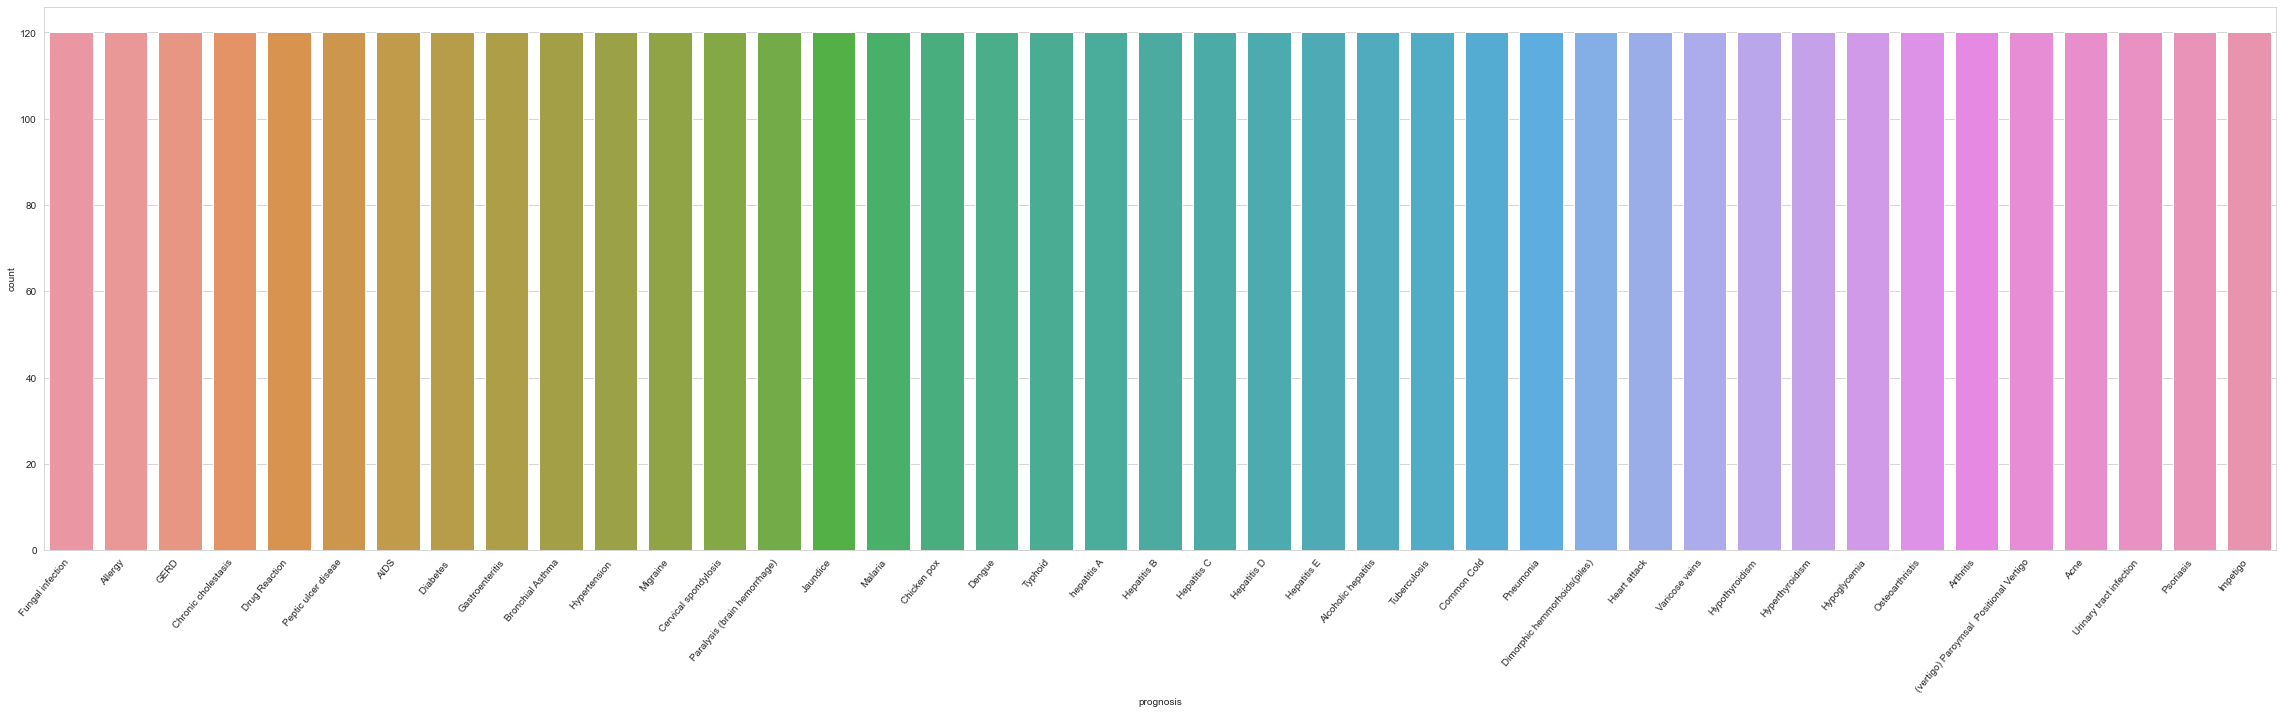

In [197]:
plt.figure(figsize=(40,10))

plot = sns.countplot(data=train_data, x='prognosis')
plot.set_xticklabels(plot.get_xticklabels(), rotation=50, ha='right')
plt.show()


<AxesSubplot:title={'center':'skin_rash'}, xlabel='itching'>

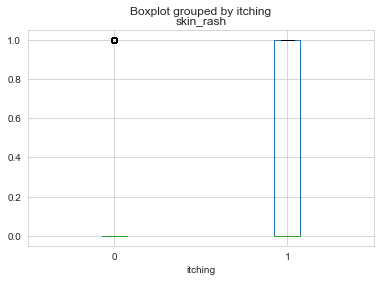

In [198]:
train_data.boxplot(column ='skin_rash', by='itching') #boxplot shows outlier, median,Q3,Q1

<AxesSubplot:>

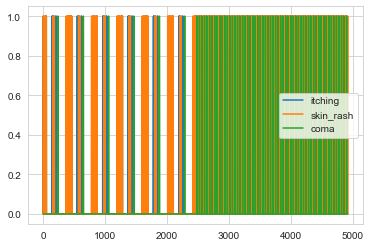

In [199]:
data1 =train_data.loc[:,["itching","skin_rash","coma"] ]
data1.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

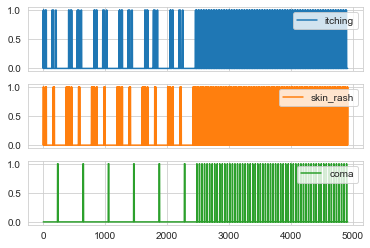

In [200]:
data1.plot(subplots =True)

<AxesSubplot:xlabel='depression', ylabel='stomach_pain'>

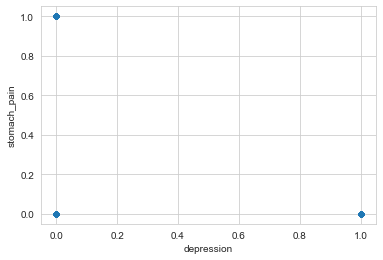

In [201]:
train_data.plot(kind= "scatter",x="depression", y="stomach_pain")

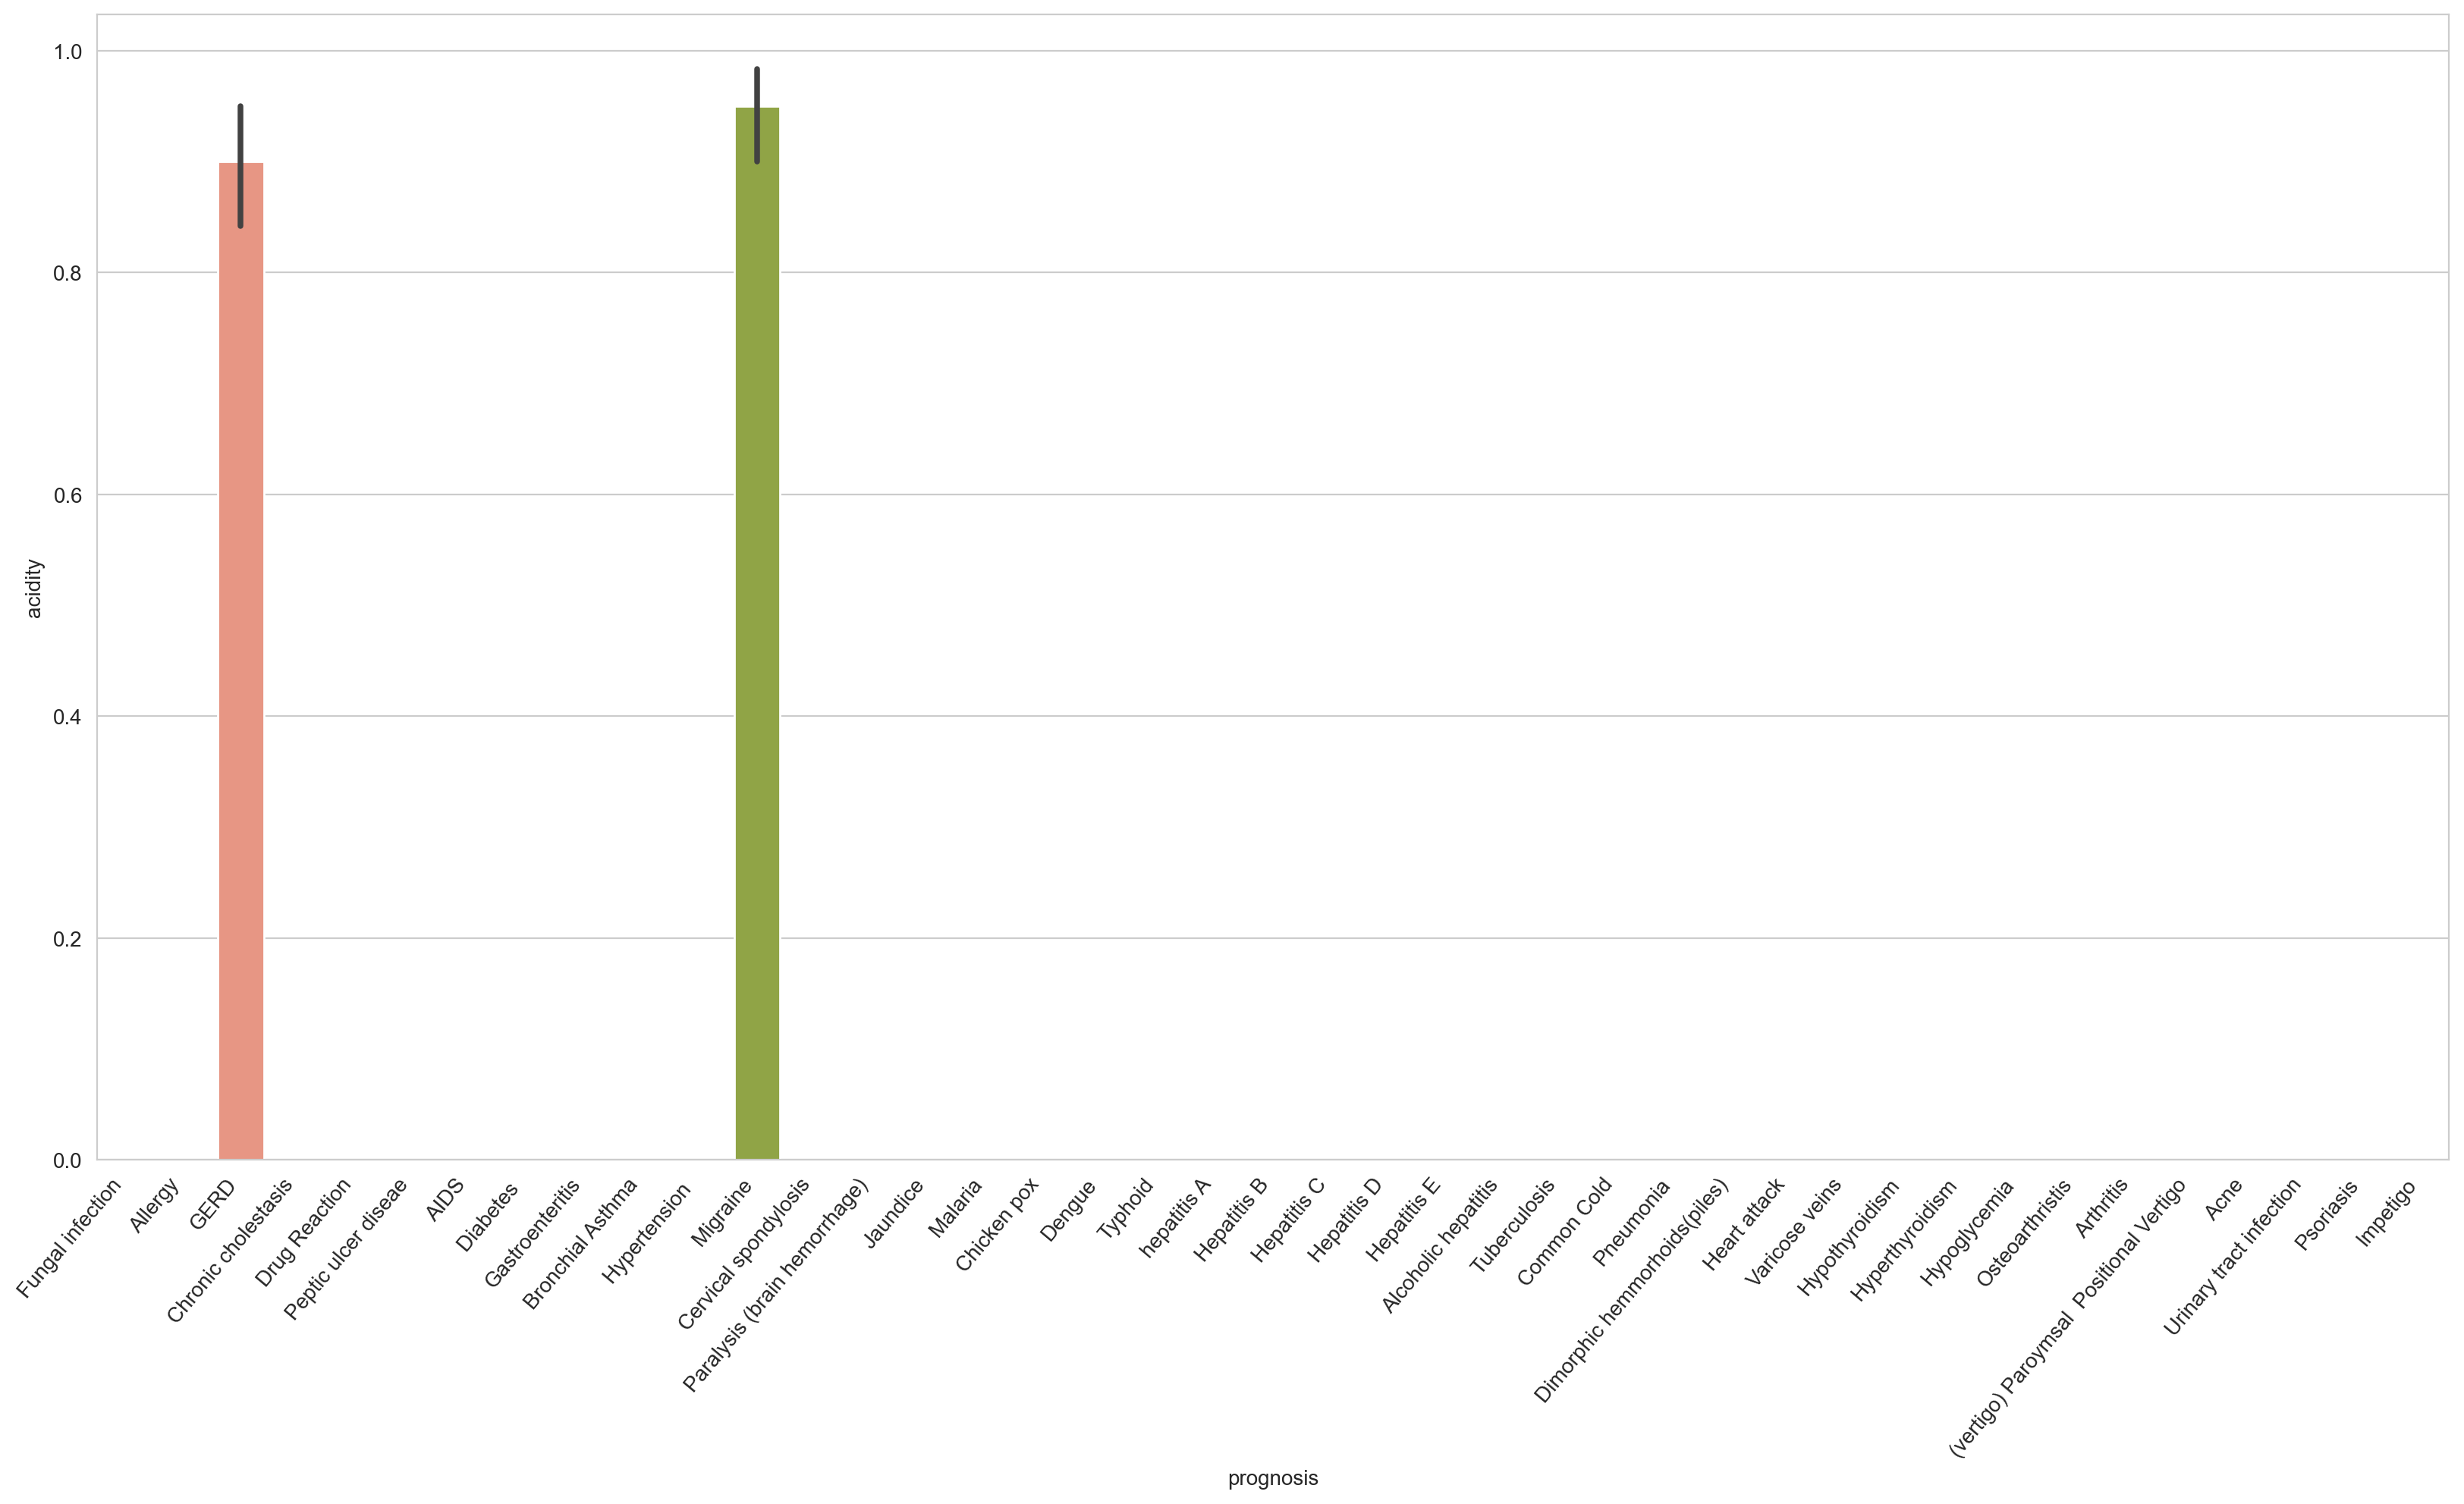

In [202]:
plt.figure(figsize=(20,10), dpi=200)
plot=sns.barplot(data=train_data, x='prognosis', y='acidity')
plot.set_xticklabels(plot.get_xticklabels(), rotation=50, ha='right')
plt.show()

<AxesSubplot:ylabel='Frequency'>

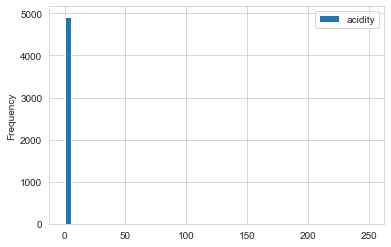

In [203]:
train_data.plot(kind="hist", y="acidity", bins = 50, range=(0,250))

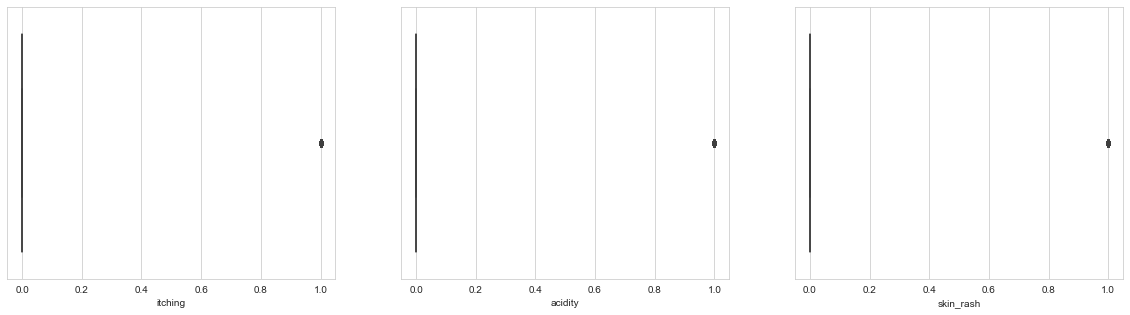

In [204]:
columns = {0:'itching' ,  1: 'acidity', 2:'skin_rash'}
fig, ax = plt.subplots(1,len(columns), figsize=(20, 5))
for key, val in columns.items(): 
    sns.boxplot(x=train_data[val], ax= ax[key])

In [205]:

y_encoded=pd.get_dummies(y_train)


In [206]:
y_encoded

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Encode the 'prognosis' column using label encoding, ensuring that all data is numerical before training the decision tree classifier.

In [207]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()
train_data['prognosis'] = label_encoder.fit_transform(train_data['prognosis'])






1- Decision Tree

In [208]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=30)
clf = clf.fit(x_train, y_train)

In [209]:
clf.get_depth()


10

In [210]:

clf.get_n_leaves()


30

In [211]:
print("Shape of X_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)


Shape of X_train: (4920, 132)
Shape of x_test: (41, 132)


In [212]:
print("Number of features in the trained model:", clf.n_features_)


Number of features in the trained model: 132


c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [213]:
y_predict=clf.predict(x_test)
y_predict


array(['Drug Reaction', 'Allergy', 'GERD',
       '(vertigo) Paroymsal  Positional Vertigo', 'Drug Reaction',
       'Alcoholic hepatitis', 'AIDS', 'Diabetes ', 'Gastroenteritis',
       'Jaundice', 'Migraine', 'Migraine', 'Cervical spondylosis',
       'Gastroenteritis', 'Jaundice', 'Malaria', 'Chicken pox',
       'Chicken pox', 'Typhoid', 'hepatitis A', 'Hepatitis B',
       'Hepatitis C', 'Hepatitis C', 'Hepatitis E', 'Alcoholic hepatitis',
       'Tuberculosis', 'Common Cold', 'Common Cold',
       'Dimorphic hemmorhoids(piles)', 'GERD', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Cervical spondylosis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Acne', 'Impetigo'], dtype=object)

In [214]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.50      1.00      0.67         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.50      1.00      0.67         1
                    Alcoholic hepatitis       0.50      1.00      0.67         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       0.00      0.00      0.00         1
                   Cervical spondylosis       0.50      1.00      0.67         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       0.00      0.00      0.00         1
                            Common Cold       0.50      1.00      0.67         1
                           

c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [215]:
y_pred=clf.predict(x_train)

print("Training accuracy: ", accuracy_score(y_train, y_pred))
print("Testing accuracy: ", accuracy_score(y_test, y_predict))


Training accuracy:  0.6548780487804878
Testing accuracy:  0.7073170731707317


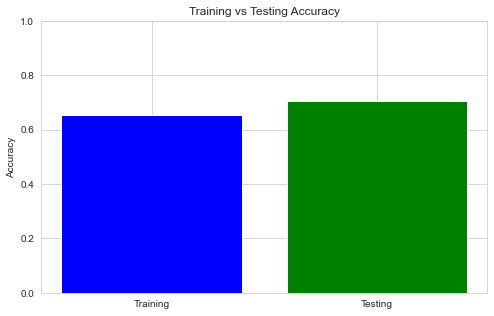

In [216]:
import matplotlib.pyplot as plt

# Assuming you have calculated the training and testing accuracies
train_accuracy = accuracy_score(y_train, y_pred)
test_accuracy = accuracy_score(y_test, y_predict)

# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


2- Random Forest

In [217]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_leaf=4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(x_train,y_train)

y_pred2=clf2.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred2))

Accuracy: 1.0


In [218]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred2))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

3- MLP

In [219]:
from sklearn.neural_network import MLPClassifier
MLPclf=MLPClassifier(activation='relu',hidden_layer_sizes=(100,),solver='adam', early_stopping=True)
MLPclf.fit(x_train,y_train)

c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with f

MLPClassifier(early_stopping=True)

In [220]:
y_pred3=MLPclf.predict(x_test)

In [221]:
print("Accuracy:",accuracy_score(y_test, y_pred3))

Accuracy: 1.0


In [222]:
print(classification_report(y_test,y_pred3))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

4- SVM

In [223]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Create an instance of SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm.fit(x_train, y_train)

# Make predictions
y_pred = svm.predict(x_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 1.0
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00 